<h1><center>DATS 6103 Intro to Data Mining Midterm Utopia</center></h1>
<h2><center> By Aditya Nayak (G27927965)</center></h2>

In [1]:
#pip install rfit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rfit

<h3>Two Worlds</h3> 
 
<p>Utopia is an ideal commonwealth whose inhabitants exist under seemingly perfect conditions. 
In this analysis, we will create two worlds: world1 and world2.</p>
<p>Data dictionary:</p>
<b>age00</b>: the age at the time of creation. This is only the population from age 30-60.
<br><b>education:</b> years of education one has had.
<br><b>marital:</b> 0-never married, 1-married, 2-divorced, 3-widowed
<br><b>gender:</b> 0-female, 1-male (for simplicity)
<br><b>ethnic:</b> 0, 1, 2 (just made up)
<br><b>income00:</b> annual income at the time of creation.
<br><b>industry:</b> (ordered with increasing average annual salary, according to govt data.)
<br>0: Leisure & Hospitality  
<br>1: Retail   
<br>2: Education   
<br>3: Health   
<br>4: Construction   
<br>5: Manufacturing   
<br>6: Professional & Business   
<br>7: Finance
  
<p>Please do whatever analysis you need, convince your audience both, one, or none of these 
worlds is fair, or close to a utopia.</p>
<p>Use plots, maybe pivot tables, and statistical tests (optional), whatever you deem appropriate 
and convincing, to draw your conclusions.</p>

<p>There are no must-dos (except plots), should-dos, cannot-dos. The more convenicing your analysis, 
the higher the grade. It's an art.</p>

In [3]:
#world1 = rfit.dfapi('World1', 'id')
#world1.to_csv("world1.csv")
world1 = pd.read_csv("world1.csv", index_col="id")
world1.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,51.965,17,0,1,0,5,76110.0
1,41.807,12,1,0,0,1,43216.0
2,36.331,12,1,0,1,3,52118.0
3,56.758,9,1,1,2,2,47770.0
4,31.051,14,0,0,0,0,34197.0


In [4]:
#world2 = rfit.dfapi('World2', 'id')
#world2.to_csv("world2.csv")
world2 = pd.read_csv("world2.csv", index_col="id")
world2.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,34.629,12,0,0,2,4,52533.0
1,48.403,16,1,1,1,0,29507.0
2,50.327,14,1,1,2,7,122156.0
3,45.059,11,1,1,1,2,53249.0
4,59.616,16,0,1,0,4,75917.0


<h3>I. Data Manipulation</h3>

In [5]:
world1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age00      24000 non-null  float64
 1   education  24000 non-null  int64  
 2   marital    24000 non-null  int64  
 3   gender     24000 non-null  int64  
 4   ethnic     24000 non-null  int64  
 5   industry   24000 non-null  int64  
 6   income00   24000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.5 MB


In [6]:
world2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age00      24000 non-null  float64
 1   education  24000 non-null  int64  
 2   marital    24000 non-null  int64  
 3   gender     24000 non-null  int64  
 4   ethnic     24000 non-null  int64  
 5   industry   24000 non-null  int64  
 6   income00   24000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.5 MB


<p>From the given datasets we can see that the attributes like marital status and gender are categorical values and are considered as integers. Hence, these variables are needed to be converted into the required data types. Thus, converting the data types in both the datasets.</p>

In [7]:
world1['gender'] = world1['gender'].astype(str)
world1['marital'] = world1['marital'].astype(str)

display(world1.dtypes)

age00        float64
education      int64
marital       object
gender        object
ethnic         int64
industry       int64
income00     float64
dtype: object

<p>Doing the same conversion in the world2 dataset.</p>

In [8]:
world2['gender'] = world2['gender'].astype(str)
world2['marital'] = world2['marital'].astype(str)

display(world2.dtypes)

age00        float64
education      int64
marital       object
gender        object
ethnic         int64
industry       int64
income00     float64
dtype: object

<p>Also, the ages of individuals are in float. Here we consider the decimal value of the years as months.</p>

<p>We can convert the strings from '0' and '1' to male and female respectively</p>

In [9]:
def gender_function(sex):
    if(sex == '0'):
        return 'Female'
    elif(sex == '1'):
        return 'Male'
    
world1['gender'] = world1['gender'].apply(gender_function)
world1.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,51.965,17,0,Male,0,5,76110.0
1,41.807,12,1,Female,0,1,43216.0
2,36.331,12,1,Female,1,3,52118.0
3,56.758,9,1,Male,2,2,47770.0
4,31.051,14,0,Female,0,0,34197.0


In [10]:
world2['gender'] = world2['gender'].apply(gender_function)
world2.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,34.629,12,0,Female,2,4,52533.0
1,48.403,16,1,Male,1,0,29507.0
2,50.327,14,1,Male,2,7,122156.0
3,45.059,11,1,Male,1,2,53249.0
4,59.616,16,0,Male,0,4,75917.0


<p>Also we can convert the industry into proper labels so we can understand the data more properly.</p>

In [11]:
#optional
def industry_function(industry):
    if(industry == 0):
        return 'Hospitality'
    elif(industry == 1):
        return 'Retail'
    elif(industry == 2):
        return 'Education'
    elif(industry == 3):
        return 'Health'
    elif(industry == 4):
        return 'Construtn'
    elif(industry == 5):
        return 'Manufac'
    elif(industry == 6):
        return 'Prof & Business'
    elif(industry == 7):
        return 'Finance'

world1['industry'] = world1['industry'].apply(industry_function)
world1.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,51.965,17,0,Male,0,Manufac,76110.0
1,41.807,12,1,Female,0,Retail,43216.0
2,36.331,12,1,Female,1,Health,52118.0
3,56.758,9,1,Male,2,Education,47770.0
4,31.051,14,0,Female,0,Hospitality,34197.0


In [12]:
world2['industry'] = world2['industry'].apply(industry_function)
world2.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,34.629,12,0,Female,2,Construtn,52533.0
1,48.403,16,1,Male,1,Hospitality,29507.0
2,50.327,14,1,Male,2,Finance,122156.0
3,45.059,11,1,Male,1,Education,53249.0
4,59.616,16,0,Male,0,Construtn,75917.0


<p>Also we can clear the marital column.</p>

In [13]:
def marital_function(stats):
    if(stats == '0'):
        return 'Not married'
    elif(stats == '1'):
        return 'Married'
    elif(stats == '2'):
        return 'Divorced'
    elif(stats == '3'):
        return 'Widow'

world1['marital'] = world1['marital'].apply(marital_function)
world1.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,51.965,17,Not married,Male,0,Manufac,76110.0
1,41.807,12,Married,Female,0,Retail,43216.0
2,36.331,12,Married,Female,1,Health,52118.0
3,56.758,9,Married,Male,2,Education,47770.0
4,31.051,14,Not married,Female,0,Hospitality,34197.0


In [14]:
world2['marital'] = world2['marital'].apply(marital_function)
world2.head(5)

,age00,education,marital,gender,ethnic,industry,income00
id,,,,,,,
0,34.629,12,Not married,Female,2,Construtn,52533.0
1,48.403,16,Married,Male,1,Hospitality,29507.0
2,50.327,14,Married,Male,2,Finance,122156.0
3,45.059,11,Married,Male,1,Education,53249.0
4,59.616,16,Not married,Male,0,Construtn,75917.0


Now that we have changed the data types for better convenience, we can proceed with the Exploratory Data Analysis.

<h3>II Data Visualization</h3>

<p>As we know that only age and income are the only numeric values present in our dataset, let us try to understand the distribution of the values of the attributes in our datasets.</p>

[Text(0.5, 0, 'Age (In Years)'), Text(0.5, 1.0, 'Age distribution in World 1')]

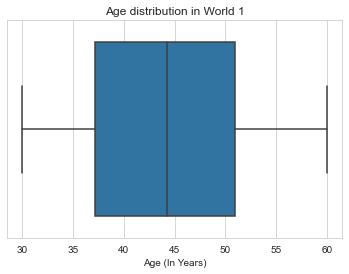

In [15]:
sns.set_style("whitegrid")
sns.boxplot(x = world1['age00']).set(xlabel ="Age (In Years)",title ='Age distribution in World 1')

In [16]:
world1.age00.describe()

count    24000.000000
mean        44.292292
std          8.264683
min         30.001000
25%         37.193000
50%         44.267500
75%         50.994750
max         59.999000
Name: age00, dtype: float64

[Text(0.5, 0, 'Income ($)'), Text(0.5, 1.0, 'Income distribution in World 1')]

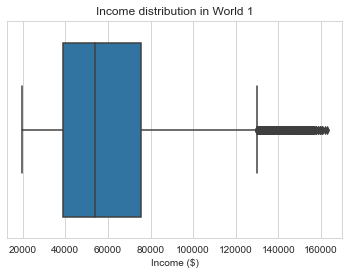

In [17]:
sns.boxplot(x = world1['income00']).set(xlabel ="Income ($)",title ='Income distribution in World 1')

In [18]:
world1.income00.describe()

count     24000.000000
mean      60642.159542
std       28104.324971
min       19928.000000
25%       38990.500000
50%       53923.500000
75%       75373.250000
max      162668.000000
Name: income00, dtype: float64

[Text(0.5, 0, 'Age (In Years)'), Text(0.5, 1.0, 'Age distribution in World 2')]

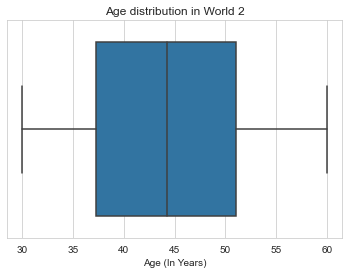

In [19]:
sns.boxplot(x = world2['age00']).set(xlabel ="Age (In Years)",title ='Age distribution in World 2')

In [20]:
world2.age00.describe()

count    24000.000000
mean        44.310798
std          8.249013
min         30.001000
25%         37.249750
50%         44.298000
75%         51.063250
max         59.995000
Name: age00, dtype: float64

[Text(0.5, 0, 'Income ($)'), Text(0.5, 1.0, 'Income distribution in World 2')]

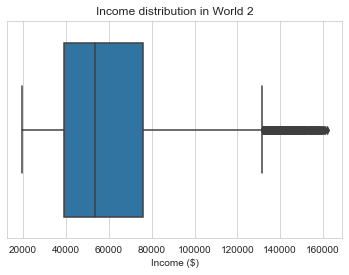

In [21]:
sns.boxplot(x = world2['income00']).set(xlabel ="Income ($)",title ='Income distribution in World 2')

In [22]:
world2.income00.describe()

count     24000.000000
mean      60634.731750
std       28195.281599
min       19680.000000
25%       38927.000000
50%       53521.500000
75%       76042.250000
max      161737.000000
Name: income00, dtype: float64

<p>The graphs help us understand that the age opf people in world 1 is between 30 and 60 as mentioned with a median and average age of 44 and the income of the people ranges from USD19928 to USD162668 with a median income of USD 53923.5 and a average of USD 60642.16</p>
<p>In world 2, the range of the age of people is similar in world 1 with a minimum income of USD 19680 to a maximum of USD 161737 having a median value of USD 53521.5 and mean income of USD 60634.73 from the entire population</p>

<p>Now let us plot a graph representing the count of men and women present in both worlds.</p>

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


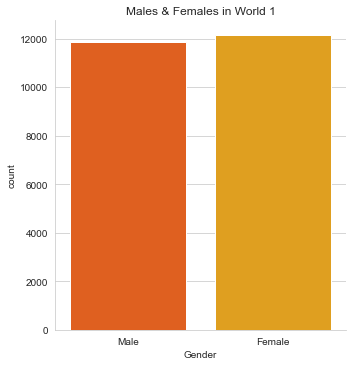

In [23]:
sns.set_style("whitegrid")
a = sns.catplot('gender',kind = 'count',data=world1 ,palette='autumn')
a.set(xlabel ="Gender", ylabel = "count", title ='Males & Females in World 1')

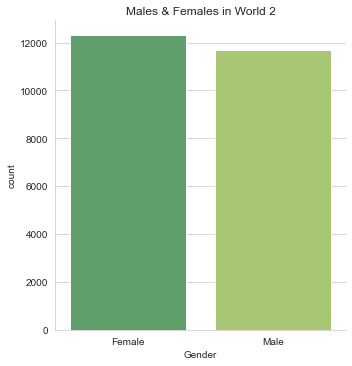

In [24]:
sns.set_style("whitegrid")
b = sns.catplot(x = 'gender',kind = 'count',data=world2 ,palette='summer')
b.set(xlabel ="Gender", ylabel = "count", title ='Males & Females in World 2')

<p>In both the worlds, the number of number of women is slightly more as compared to men. Now let us plot a bar graph showing the distribution of men and women in different sectors.</p>

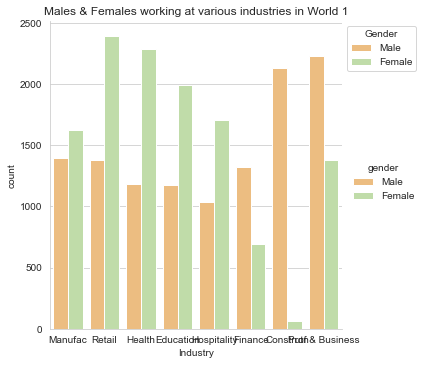

In [25]:
sns.set_style("whitegrid")
c = sns.catplot(x = 'industry',hue='gender',kind = 'count',data=world1, palette = 'Spectral')
c.set(xlabel ="Industry", title ='Males & Females working at various industries in World 1')
plt.legend(title='Gender',bbox_to_anchor = (1, 1))
plt.show(c)

<p>The following graph shows the count of the number of males and females working in various industries in world 1 with respect to the genders:</p>

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


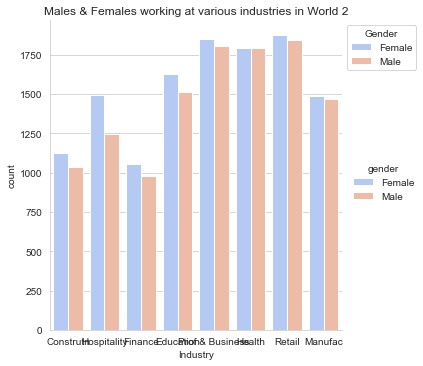

In [26]:
sns.set_style("whitegrid")
d = sns.catplot('industry',hue='gender',kind = 'count',data=world2, palette = 'coolwarm')
d.set(xlabel ="Industry", title ='Males & Females working at various industries in World 2')
plt.legend(title='Gender',bbox_to_anchor = (1, 1))
plt.show(d)

The following are the count of the people working in various industries in the following order in world 2:

<p>From the graphs, we can understand the population of men and women in both the worlds woking in various industries, and can also notice the number of females working is more in majority of the industries. So to determine if there is any gender bias we plot a scatterplot of age vs. income with considering the marital status of the people.</p>
<p>Thus, in order to analyse efficiently, we split the datasets into subsets of males and females to check if there is any kind of inequality among the genders and see if their marital status has any impact or difference in their annual incomes.</p>

In [27]:
world1_males = world1[world1['gender'] == 'Male']
world1_females = world1[world1['gender'] == 'Female']

world2_males = world2[world2['gender'] == 'Male']
world2_females = world2[world2['gender'] == 'Female']

print('World1:')
print("Males:")
print(world1_males.head(5))
print("Females:")
print(world1_females.head(5))

print("\n\nWorld2:")
print("Males:")
print(world2_males.head(5))
print("Females:")
print(world2_females.head(5))

World1:
Males:
     age00  education      marital gender  ethnic     industry  income00
id                                                                      
0   51.965         17  Not married   Male       0      Manufac   76110.0
3   56.758          9      Married   Male       2    Education   47770.0
6   33.908         14  Not married   Male       1  Hospitality   29312.0
10  47.074         16  Not married   Male       2      Manufac   70042.0
13  38.679         16      Married   Male       2       Retail   45089.0
Females:
     age00  education      marital  gender  ethnic     industry  income00
id                                                                       
1   41.807         12      Married  Female       0       Retail   43216.0
2   36.331         12      Married  Female       1       Health   52118.0
4   31.051         14  Not married  Female       0  Hospitality   34197.0
5   38.566         16      Married  Female       1       Health   47409.0
7   30.427         16

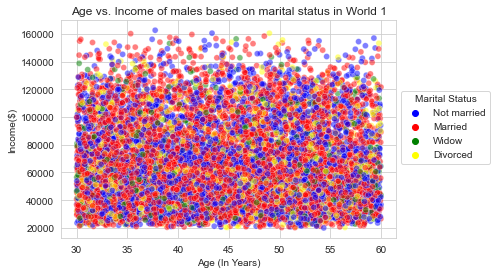

In [28]:
sns.set_style("whitegrid")
e = sns.scatterplot(x = 'age00', y = 'income00',hue = 'marital', data = world1_males, palette = ['blue','red','green','yellow'],alpha = 0.5)
e.set(xlabel ="Age (In Years)",ylabel = 'Income($)', title ='Age vs. Income of males based on marital status in World 1')
e.legend(title='Marital Status',bbox_to_anchor = (1, .7))

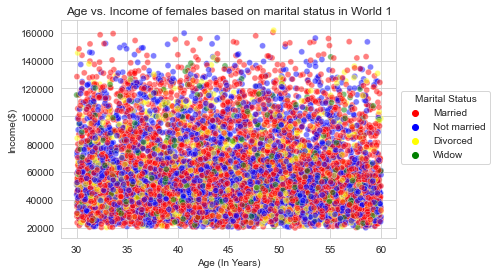

In [29]:
sns.set_style("whitegrid")
f = sns.scatterplot(x = 'age00', y = 'income00',hue = 'marital', data = world1_females, palette = ['red','blue','yellow','green',],alpha = 0.5)
f.set(xlabel ="Age (In Years)",ylabel = 'Income($)', title ='Age vs. Income of females based on marital status in World 1')
f.legend(title='Marital Status',bbox_to_anchor = (1, .7))

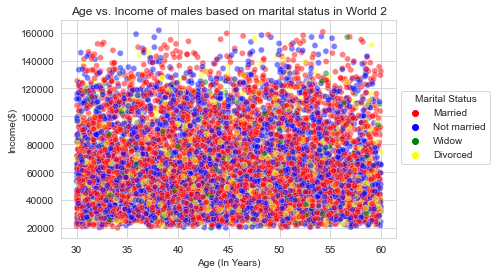

In [30]:
sns.set_style("whitegrid")
g = sns.scatterplot(x = 'age00', y = 'income00',hue = 'marital', data = world2_males, palette = ['red','blue','green','yellow'],alpha = 0.5)
g.set(xlabel ="Age (In Years)",ylabel = 'Income($)', title ='Age vs. Income of males based on marital status in World 2')
g.legend(title = 'Marital Status',bbox_to_anchor = (1, .7))

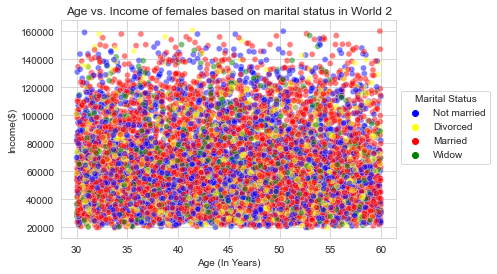

In [31]:
sns.set_style("whitegrid")
h = sns.scatterplot(x = 'age00', y = 'income00',hue = 'marital', data = world2_females, palette = ['blue','yellow','red','green'],alpha = 0.5)
h.set(xlabel ="Age (In Years)",ylabel = 'Income($)', title ='Age vs. Income of females based on marital status in World 2')
h.legend(title = 'Marital Status',bbox_to_anchor = (1, .7))

<p>As we cannot locate any discrepancies from the graphs above, we can thus conclude that there is eqality in pay irrespective of age and marital status and difference between the salaries of people can be expected based on the experience of each individual in their respective industrial domain.</p>

<p>We will now plot graphs based of people's income to check if there any discrimation based on gender or race.</p>

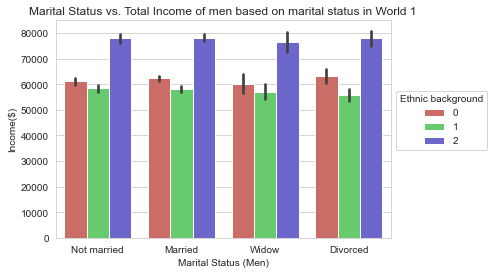

In [32]:
sns.set_style("whitegrid")
m = sns.barplot(data=world1_males, x = 'marital', y = 'income00', hue = 'ethnic', palette = 'hls')
m.set(xlabel ="Marital Status (Men)",ylabel = 'Income($)', title ='Marital Status vs. Total Income of men based on marital status in World 1')
m.legend(title='Ethnic background',bbox_to_anchor = (1, .7))

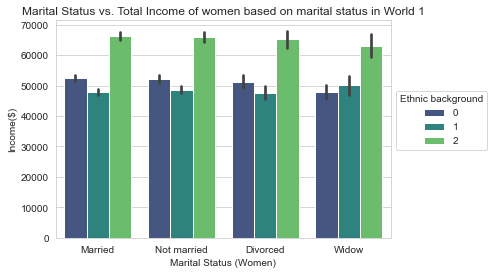

In [33]:
sns.set_style("whitegrid")
m = sns.barplot(data=world1_females, x = 'marital', y = 'income00', hue = 'ethnic', palette = 'viridis')
m.set(xlabel ="Marital Status (Women)",ylabel = 'Income($)', title ='Marital Status vs. Total Income of women based on marital status in World 1')
m.legend(title='Ethnic background',bbox_to_anchor = (1, .7))

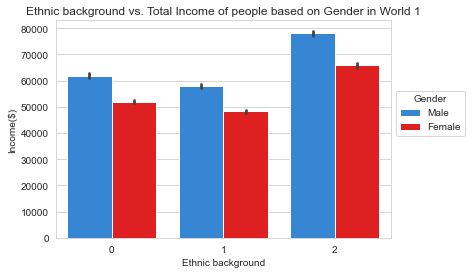

In [34]:
sns.set_style("whitegrid")
i = sns.barplot(data=world1, x = 'ethnic', y = 'income00',hue = 'gender', palette = ['#1C86EE','red'])
i.set(xlabel ="Ethnic background",ylabel = 'Income($)', title ='Ethnic background vs. Total Income of people based on Gender in World 1')
i.legend(title='Gender',bbox_to_anchor = (1, .7))

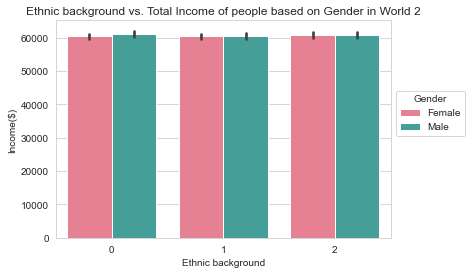

In [35]:
sns.set_style("whitegrid")
i = sns.barplot(data=world2, x = 'ethnic', y = 'income00',hue = 'gender', palette = 'husl')
i.set(xlabel ="Ethnic background",ylabel = 'Income($)', title ='Ethnic background vs. Total Income of people based on Gender in World 2')
i.legend(title='Gender',bbox_to_anchor = (1, .7))

<p>From the two graphs above, we can understand that the total income earned by people having ethnic backgrounds 0 and 1 is the lowest among all other women of different ethnic backgrounds. Also, the total income earned by men of all ethnic backgrounds is greater than women of the respective backgrounds in world 1.Whereas, in world 2 the total income of men and women is almost the same.</p>
<p>Thus, we can infer that world 1 experiences gender and racial bias as compared to world 2.
<br> To verify, we can split the data into 3 separate subsets of world 1 and 2 based on ethnicity:</p>

In [36]:
world1_eth0 = world1[world1['ethnic'] == 0]
world1_eth1 = world1[world1['ethnic'] == 1]
world1_eth2 = world1[world1['ethnic'] == 2]

print("World1:\nEthnic 0:")
print(world1_eth0.head())
print("\nEthnic 1:")
print(world1_eth1.head())
print("\nEthnic 2:")
print(world1_eth2.head())

World1:
Ethnic 0:
     age00  education      marital  gender  ethnic     industry  income00
id                                                                       
0   51.965         17  Not married    Male       0      Manufac   76110.0
1   41.807         12      Married  Female       0       Retail   43216.0
4   31.051         14  Not married  Female       0  Hospitality   34197.0
7   30.427         16      Married  Female       0  Hospitality   28161.0
14  52.662         14      Married  Female       0      Finance  118033.0

Ethnic 1:
     age00  education      marital  gender  ethnic     industry  income00
id                                                                       
2   36.331         12      Married  Female       1       Health   52118.0
5   38.566         16      Married  Female       1       Health   47409.0
6   33.908         14  Not married    Male       1  Hospitality   29312.0
9   46.042         16      Married  Female       1       Retail   34490.0
11  41.84

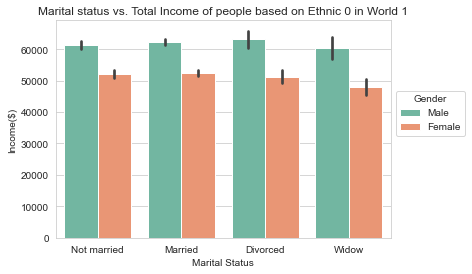

In [37]:
sns.set_style("whitegrid")
j = sns.barplot(data=world1_eth0, x = 'marital', y = 'income00',hue = 'gender', palette = 'Set2')
j.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 0 in World 1')
j.legend(title='Gender',bbox_to_anchor = (1, .7))

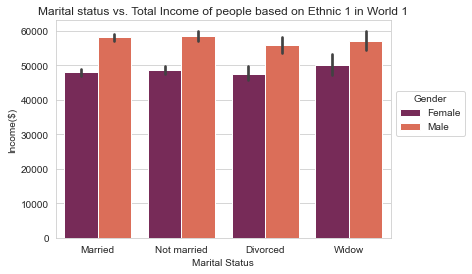

In [38]:
sns.set_style("whitegrid")
k = sns.barplot(data=world1_eth1, x = 'marital', y = 'income00',hue = 'gender', palette = 'rocket')
k.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 1 in World 1')
k.legend(title='Gender',bbox_to_anchor = (1, .7))

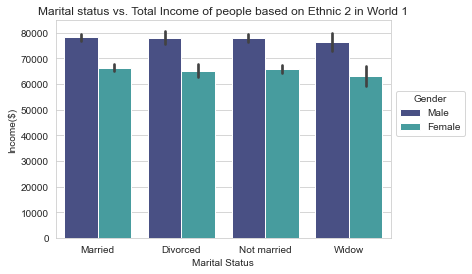

In [39]:
sns.set_style("whitegrid")
l = sns.barplot(data=world1_eth2, x = 'marital', y = 'income00',hue = 'gender', palette = 'mako')
l.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 2 in World 1')
l.legend(title='Gender',bbox_to_anchor = (1, .7))

<p>From these plots we can also understand that there is gender discrimination between men and women irrespective of their marital status, especially in ethnic 1 category where the total income of women is maximum of 50,000/- and lower. Even the total annual income of ethnic 1 men is the least as compared to other ethnicities.</p>

<p>Let us now see there are any similar patterns observed in world 2.</p>

In [40]:
world2_eth0 = world2[world2['ethnic'] == 0]
world2_eth1 = world2[world2['ethnic'] == 1]
world2_eth2 = world2[world2['ethnic'] == 2]

print("World 2:\n Ethnic 0:")
print(world2_eth0.head())
print("\nEthnic 1:")
print(world2_eth1.head())
print("\nEthnic 2:")
print(world2_eth2.head())

World 2:
 Ethnic 0:
     age00  education      marital  gender  ethnic         industry  income00
id                                                                           
4   59.616         16  Not married    Male       0        Construtn   75917.0
5   38.149         16      Married    Male       0        Construtn   81456.0
6   39.728         14      Married    Male       0  Prof & Business   79712.0
11  49.933         16        Widow  Female       0           Retail   30238.0
17  54.776         18      Married    Male       0           Retail   31902.0

Ethnic 1:
     age00  education      marital  gender  ethnic     industry  income00
id                                                                       
1   48.403         16      Married    Male       1  Hospitality   29507.0
3   45.059         11      Married    Male       1    Education   53249.0
7   40.735         14  Not married    Male       1       Health   52545.0
8   41.527         14     Divorced  Female       1   

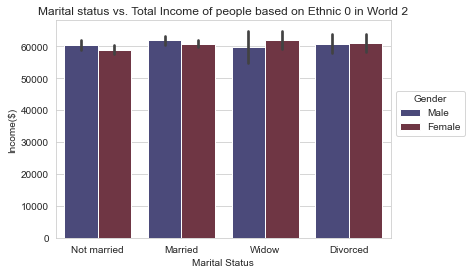

In [41]:
sns.set_style("whitegrid")
o = sns.barplot(data=world2_eth0, x = 'marital', y = 'income00',hue = 'gender', palette = 'icefire')
o.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 0 in World 2')
o.legend(title='Gender',bbox_to_anchor = (1, .7))

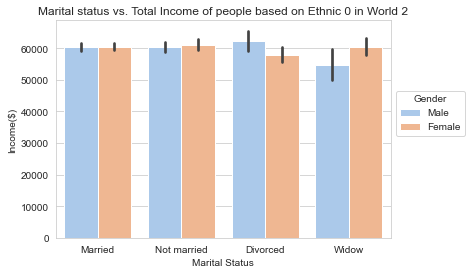

In [42]:
sns.set_style("whitegrid")
o = sns.barplot(data=world2_eth1, x = 'marital', y = 'income00',hue = 'gender', palette = 'pastel')
o.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 0 in World 2')
o.legend(title='Gender',bbox_to_anchor = (1, .7))

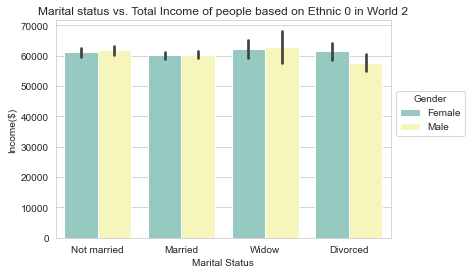

In [43]:
sns.set_style("whitegrid")
o = sns.barplot(data=world2_eth2, x = 'marital', y = 'income00',hue = 'gender', palette = 'Set3')
o.set(xlabel ="Marital Status",ylabel = 'Income($)', title ='Marital status vs. Total Income of people based on Ethnic 0 in World 2')
o.legend(title='Gender',bbox_to_anchor = (1, .7))

<p>From the graphs plotted, we can observe that the total income of men and women is almost the same of all ethnic backgrounds which cannot be said for the people in world 1.</p>

<p>Now let's try to see if there is any kind of bias or irregularity in the education received by each ethnicity or gender by plotting a scatterplot of Age vs. Years of Education based on ethnicity and also by checking the literacy percentange in both worlds.</p>

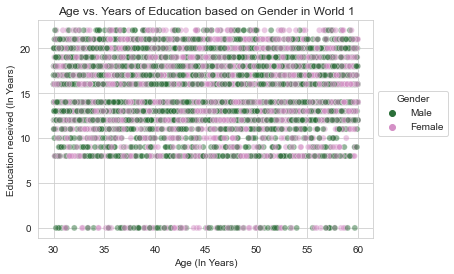

In [44]:
sns.set_style("whitegrid")
n = sns.scatterplot(x = 'age00', y = 'education',hue = 'gender', data = world1, palette = 'cubehelix',alpha = 0.5)
n.set(xlabel ="Age (In Years)",ylabel = 'Education received (In Years)', title ='Age vs. Years of Education based on Gender in World 1')
n.legend(title = 'Gender',bbox_to_anchor = (1, .7))

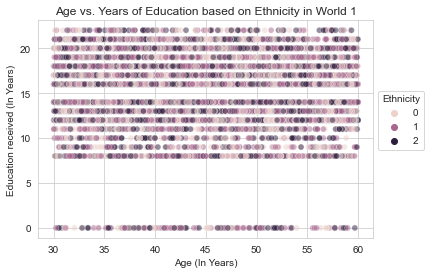

In [45]:
sns.set_style("whitegrid")
n = sns.scatterplot(x = 'age00', y = 'education',hue = 'ethnic', data = world1,alpha = 0.5)
n.set(xlabel ="Age (In Years)",ylabel = 'Education received (In Years)', title ='Age vs. Years of Education based on Ethnicity in World 1')
n.legend(title = 'Ethnicity',bbox_to_anchor = (1, .7))

In [46]:
print(f"The number of people without an education in world 1 is: {world1['education'].value_counts()[0]}")
print(f"And the total number of records is: {world1['education'].count()}")   
print (f"Hence, the percent of people without an education in world 1 is: {(world1['education'].value_counts()[0]/world1['education'].count())*100:.2f}%\n")

The number of people without an education in world 1 is: 154
And the total number of records is: 24000
Hence, the percent of people without an education in world 1 is: 0.64%



<p>Now let us try to see if similar patterns are also visible in World 2 as well:</p>

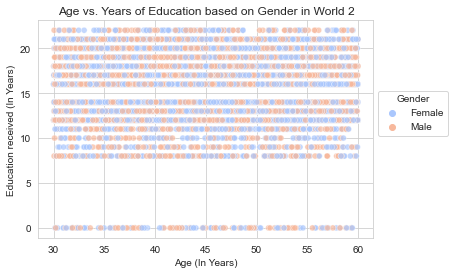

In [47]:
sns.set_style("whitegrid")
n = sns.scatterplot(x = 'age00', y = 'education',hue = 'gender', data = world2, palette = 'coolwarm',alpha = 0.7)
n.set(xlabel ="Age (In Years)",ylabel = 'Education received (In Years)', title ='Age vs. Years of Education based on Gender in World 2')
n.legend(title = 'Gender',bbox_to_anchor = (1, .7))

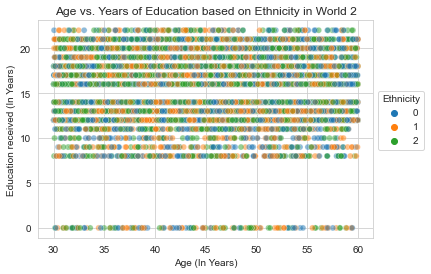

In [48]:
sns.set_style("whitegrid")
n = sns.scatterplot(x = 'age00', y = 'education',hue = 'ethnic', data = world2,palette = 'tab10',alpha = 0.5)
n.set(xlabel ="Age (In Years)",ylabel = 'Education received (In Years)', title ='Age vs. Years of Education based on Ethnicity in World 2')
n.legend(title = 'Ethnicity',bbox_to_anchor = (1, .7))

In [49]:
print(f"The number people not having an education in World 2 is: {world2['education'].value_counts()[0]}")
print(f"And the total number of records is: {world2['education'].count()}")
print(f"Thus, the percent of people who don't have an education  in world 2 is: {(world2['education'].value_counts()[0]/world2['education'].count())*100:.2f}%")

The number people not having an education in World 2 is: 143
And the total number of records is: 24000
Thus, the percent of people who don't have an education  in world 2 is: 0.60%


<p>From the graphs and the calculations done above we understand that, some people have not received an education which is similar in both worlds. However there are more people who have'nt received any education in world 1 as compared to world 2 and the majority of the people have an education of at least 8 years ranging to 22 years. Also, no case of racial or gender bias is seen.</p>

<p>Thus, from analysing the given data by performing data cleaning and data visualization operations, we can come to a conclusion that world 1 does not look as a Utopia as there is gender and racial bias present in the total income earned by the people there. Also, the rate of illiteracy in world 1 is 0.64% and the illiteracy in world 2 is approximately 0.60%</p>